# Phase 4 Final Project Submission

* Student name: Heath Rittler
* Student pace: Self paced
* Scheduled project review date/time: tbd
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@heathlikethecandybar

# Introduction

## Business Case/ Summary

**Business Problem:** Enhancing Movie Recommendations for an Online Streaming Platform

**Description:** You are working for an online streaming platform that offers a vast collection of movies to its subscribers. The platform wants to improve the movie recommendation system to enhance user engagement, increase user satisfaction, and ultimately drive more subscriptions. Currently, the platform provides basic recommendations based on popular movies, but they want to implement a more personalized recommendation system.

**Deployment:** Integrate the recommendation system into the streaming platform's backend infrastructure. Continuously monitor and update the recommendation models to adapt to changing user preferences and ensure optimal performance.

**Solution:** Develop a recommendation system that combines collaborative filtering techniques with content-based approaches. Utilize user-item rating data to identify similar users and recommend movies that have been positively rated by similar users. Additionally, leverage movie metadata such as genre, director, actors, and plot summary to provide content-based recommendations that match user preferences.

## Modelling and Approach

There are two common recommendation filtering techniques: collaborative filtering and content filtering.

* `Collaborative filtering` requires the model to learn the connections/similarity between users so that it can generate the best recommendation options based on users’ previous choices, or ratings. 
* `Content filtering` needs the profile of both the users and the items so that the system can determine the recommendation according to the common properties of the users and respective items.

## Metrics for Evaluation

### **Evaluation**

Since we are dealing with a classication problem, we will be using RMSE and MAE to evaluate our model's performance. Here are a few reasons why RMSE:

**Evaluation of Prediction Accuracy:** RMSE measures the average difference between the predicted ratings and the actual ratings. It gives a comprehensive understanding of how well the recommendation system is able to predict user preferences. A lower RMSE indicates that the system is making more accurate predictions.

**Sensitivity to Prediction Errors:** RMSE takes into account the magnitude of prediction errors. Squaring the errors and taking the square root in RMSE amplifies larger errors, making the metric more sensitive to significant deviations between predicted and actual ratings. This is important in recommendation systems where even small deviations can significantly impact user satisfaction.

**Alignment with User Experience:** RMSE is aligned with the user's perspective since it focuses on the differences between predicted and actual ratings. By minimizing RMSE, recommendation systems aim to provide more personalized and relevant recommendations, enhancing the user experience.


## Core Field Names and Definitions from Data Source

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files 
* `links.csv`
* `movies.csv` 
* `ratings.csv` 
* `tags.csv`

### `Formatting and Encoding`
The dataset files are written as comma-separated values files with a single header row. Columns that contain commas (,) are escaped using double-quotes ("). These files are encoded as UTF-8. If accented characters in movie titles or tag values (e.g. Misérables, Les (1995)) display incorrectly, make sure that any program reading the data, such as a text editor, terminal, or script, is configured for UTF-8.

**`User Ids`**
MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).

**`Movie Ids`**
Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

### `Ratings Data File Structure (ratings.csv)`
All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.0 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### `Tags Data File Structure (tags.csv)`
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

userId,movieId,tag,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### `Movies Data File Structure (movies.csv)`
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

### `Links Data File Structure (links.csv)`
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,imdbId,tmdbId
movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

# Data Load, Cleaning

## Importing Packages

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

from datetime import datetime

from surprise import accuracy, Dataset, KNNWithMeans, KNNBasic, KNNBaseline, SVD, SVDpp, KNNBasic, NMF, CoClustering, SlopeOne, NormalPredictor, Reader
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer


## Choosing Colors & Templates

In [2]:
# choosing standard colors for project
pal = sns.color_palette("coolwarm_r")

color_codes = ['red', 'peach', 'tan', 'gray', 'lightblue', 'blue']

my_cmap = ListedColormap(sns.color_palette(pal).as_hex())

pal.as_hex()

['#e26952', '#f7a889', '#edd1c2', '#c9d7f0', '#9abbff', '#6788ee']

## Import Data

### Ratings

In [3]:
# import ratings data file
ratings = pd.read_csv('data/ratings.csv')

In [4]:
# view the first 5 rows
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# view data types record counts
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# check for missing values within any columns
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Tags

In [7]:
# import tags data file
tags = pd.read_csv('data/tags.csv')

In [8]:
# view the first 5 rows
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
# view data types record counts
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [10]:
# check for missing values within any columns
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

### Movies

In [11]:
# import movies data file
movies = pd.read_csv('data/movies.csv')

In [12]:
# view the first 5 rows
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# view data types record counts
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [14]:
# check for missing values within any columns
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

### Sparsity Understanding

Sparsity is an important concept in recommendation systems because it refers to the scarcity of ratings or interactions between users and items in a recommendation dataset. In other words, it indicates the extent to which the dataset is incomplete or lacks sufficient information about user preferences.

In [15]:
# joining movies onto ratings and dropping our timestamp column.  It is worthless to us at this point.
data_full = pd.merge(
    ratings,
    movies,
    how="left",
    on='movieId'
).drop(['timestamp'], axis=1)

data_full

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,Get Out (2017),Horror
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi


In [16]:
# check sparsity of matrix
numratings = len(data_full['rating'])
numusers = len(data_full['userId'].unique())
numitems = len(data_full['movieId'].unique())

sparse = 1 - (numratings/(numusers*numitems))
sparse

0.9830003169443864

Our matrix is pretty sparse.  We should remove users with a low number of ratings (<200) and movies that didn't have a decent number of ratings (<10).  Before we do that though, I am going to save a copy of our dataframe here in case we will need it later.

In [17]:
# creating a copy here in case we want to come back to our original data_full df --> now data_clean
data_clean = data_full

In [18]:
# filter out users who have rated less than 100 movies 
data = data_full.groupby('userId').filter(lambda x: len(x)>=100)

In [19]:
# filter out movies who have fewer than 50 ratings 
data = data.groupby('movieId').filter(lambda x: len(x)>=25)

In [20]:
# another check on the sparsity of adjusted matrix
numratings = len(data['rating'])
numusers = len(data['userId'].unique())
numitems = len(data['movieId'].unique())

sparse = 1 - (numratings/(numusers*numitems))
sparse

0.7942970444926557

This is much better -- our sparsity is now at 79%.  These improvements should give us better performance in our modelling below.  We don't have any NAs or Null values, so we should be good moving forward in our analysis.  We could continue to remove ratings, but we want to keep a decent number because we don't know if these movies that have more ratings generally mean they are more popular or not.

# Exploratory Data Analysis

In [21]:
# views the ratings dataset and high level stats.
data.describe()

,userId,movieId,rating
count,46270.00000,46270.000000,46270.000000
mean,317.76676,12228.375946,3.621720
std,183.49180,24725.288553,0.984628
min,1.00000,1.000000,0.500000
25%,166.00000,1088.250000,3.000000
50%,313.00000,2395.000000,4.000000
75%,477.00000,5630.000000,4.000000
max,610.00000,148626.000000,5.000000


In [22]:
# of distinct movies/ movieIds
movie_count = str(data['movieId'].nunique())

print("The data set contains " + movie_count + " distinct movies with at least 50 ratings.")

The data set contains 907 distinct movies with at least 50 ratings.


In [23]:
# of distinct users/ userIds
user_count = str(data['userId'].nunique())

print("The data set contains " + user_count + " distinct users with at least 100 ratings.")

The data set contains 248 distinct users with at least 100 ratings.


In [24]:
# of ratings
review_count = str(data['userId'].count())

print("The data set contains " + review_count + " ratings.")

The data set contains 46270 ratings.


In [25]:
# average and median reviews
avg_review = str(round(data.rating.mean(),2))
med_review = str(round(data.rating.median(),2))

print("The average review for all movies is " 
      + avg_review 
      + ", and the median review for all movies is " 
      + med_review 
      + ".")

The average review for all movies is 3.62, and the median review for all movies is 4.0.


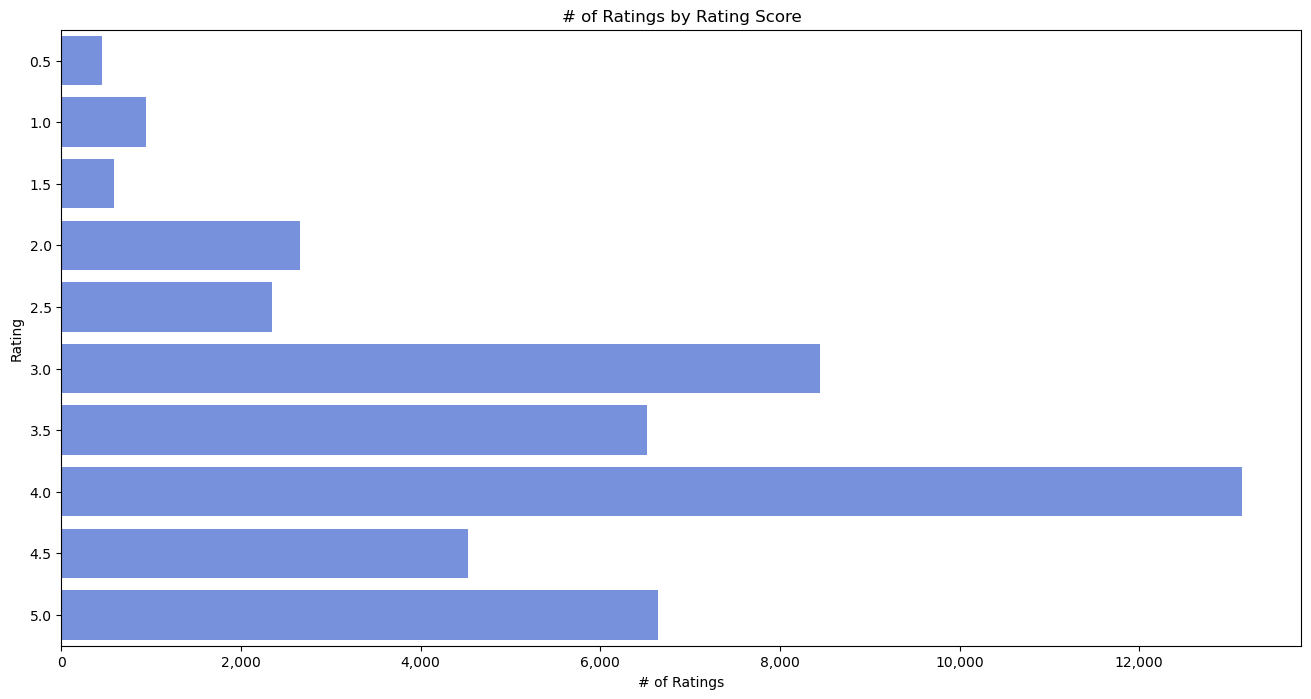

In [26]:
# show total number of ratings by rating score
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('# of Ratings by Rating Score')


bp = sns.countplot(data=data, 
            y='rating', 
            color=pal[5]
            )

bp.set_ylabel('Rating')
bp.set_xlabel('# of Ratings')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

Not surprisingly it looks like the most ratings are between 3 to 5.  I believe this is pretty common for these types of reviews.  Let's continue to move on and see if there are other insights into genre, or year reviewed.  Here are some reasons why rating biases typically happen:

**Positivity Bias:** People generally tend to have a positive bias when providing ratings or feedback. They may be more inclined to rate something positively if they had a satisfactory experience or if they want to express their overall satisfaction with the item. This bias can contribute to a higher concentration of ratings in the upper range.

**Selection Bias:** Ratings are often voluntary, meaning that individuals choose whether or not to rate a particular item. Those who have particularly positive experiences or strong opinions about the item are more likely to provide ratings. This selection bias can lead to a higher proportion of positive ratings and an overall skew towards the higher end of the rating scale.

**Social Desirability Bias:** People may feel socially influenced to give positive ratings, especially when they know that their ratings are visible to others or when they want to maintain a positive image or reputation. This bias can result in inflated ratings and a higher concentration of positive ratings.

**Consumer Expectations:** Consumers often have certain expectations when they engage with a product or service. If the item meets or exceeds their expectations, they are more likely to rate it positively. Since people tend to choose items that align with their preferences or needs, it is common for ratings to be skewed towards the higher end as consumers rate items that already match their preferences.

**Satisfaction Threshold:** In many cases, people may only choose to rate items when they are sufficiently satisfied. If an item falls below a certain satisfaction threshold, individuals may choose not to rate it at all, leading to a concentration of positive ratings.

In [27]:
#Add a feature 'year' that shows which year the movie is from 
data['year'] = data['title'].str.extract(r'\((\d{4})\)')
data.head(5)

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [28]:
# creating a cleaner dataframe to visualize ratings by year
ratings_yr_chrt = (
    data
    .groupby('year')['rating']
    .mean()
    .reset_index()
    )

counts = (
    data
    .groupby('year')['rating']
    .count()
    .reset_index()
    )


result = pd.merge(ratings_yr_chrt, counts, how="inner", on=['year', 'year'])
result

,year,rating_x,rating_y
0,1937,3.600000,60
1,1939,3.819672,122
2,1940,3.561856,97
3,1941,3.931298,131
4,1942,4.026316,114
...,...,...,...
68,2012,3.698718,390
69,2013,3.656780,118
70,2014,3.855499,391
71,2015,3.887352,253


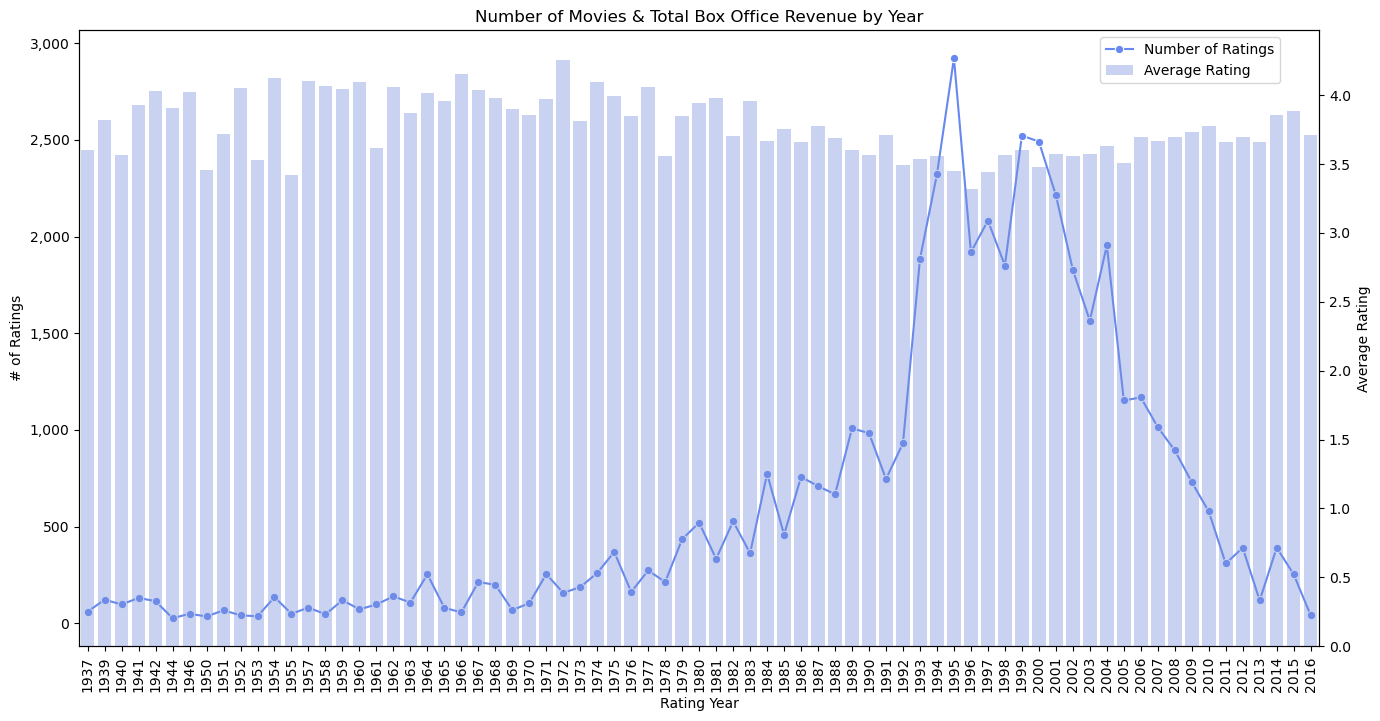

In [29]:
# summary chart for number of ratings and average rating by rating year
fig, ax1 = plt.subplots(figsize=(16,8))

lp = sns.lineplot(data = result['rating_y'], 
                  marker='o', 
                  sort = False, 
                  ax=ax1, 
                  label='Number of Ratings', 
                  color=pal[5])

ax2 = ax1.twinx()

bp = sns.barplot(data = result, 
                 x='year', 
                 y='rating_x', 
                 alpha=0.4, 
                 ax=ax2, 
                 color=pal[5], 
                 label='Average Rating')

ax1.set_title('Number of Movies & Total Box Office Revenue by Year')
ax1.set_xlabel('Rating Year')
ax1.set_ylabel('# of Ratings')
ax2.set_ylabel('Average Rating')
fig.legend(loc='upper right', bbox_to_anchor=(.88,.88))
ax1.get_legend().remove()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.set_major_formatter(tick);

Interesting enough it looks like the largest number of ratings were for movies that came out in the mid 1990s.  Older movies had roughly higher ratings, and also not a ton of reviews in those years respectively.  I think this distribution probably makes sense and most likely correlates with how movies were funded over time.  It could also just be a result of our data set.  Either way something for us to consider when modeling.  These movies may have a tendency to have a higher probability of being suggested (or not) because there were more ratings to base whether or not the movie was good or bad.

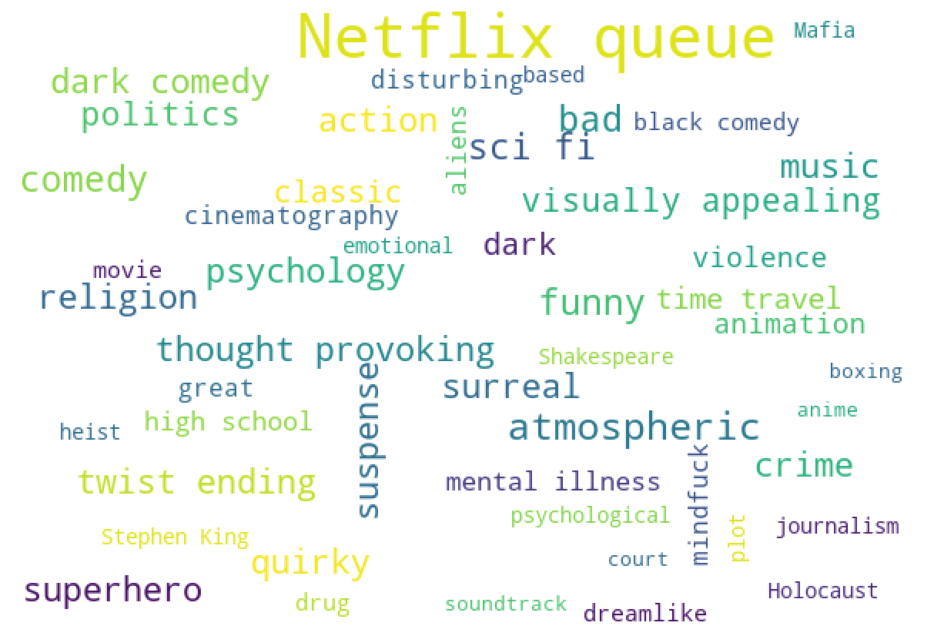

In [30]:
# creating a word cloud for the tags that were created as a part of the review process.
from wordcloud import WordCloud

# Read the whole text.
text = tags['tag']

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(tags['tag']))

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",
                      max_words=50,
                      max_font_size=40, 
                      relative_scaling=.5,
                      width=600, 
                      height=400).generate(' '.join(tags['tag']))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This is just a super rough word cloud to see if there is any sentiment that we can pick up on.  Looks like netflix is a mentioned quite a bit, along with visually appealing, and thought provoking to name a few.  Let's dig in further to the average ratings for movies.

In [31]:
# creating a dataframe for visualizing the average review per movie, and the # of reviews.
movie_chrt_cnt = (
    data
    .groupby(['movieId', 'title'])
    .agg(avg_rating=('rating','mean'),
         rating_cnt=('rating','count'))
    .reset_index()
    .sort_values(by='rating_cnt', ascending=False)
    )

movie_chrt_cnt.head(10)

,movieId,title,avg_rating,rating_cnt
80,356,Forrest Gump (1994),4.090426,188
429,2571,"Matrix, The (1999)",4.120690,174
64,296,Pulp Fiction (1994),4.226744,172
57,260,Star Wars: Episode IV - A New Hope (1977),4.251497,167
69,318,"Shawshank Redemption, The (1994)",4.428571,161
128,593,"Silence of the Lambs, The (1991)",4.197452,157
211,1196,Star Wars: Episode V - The Empire Strikes Back...,4.272436,156
222,1210,Star Wars: Episode VI - Return of the Jedi (1983),4.113014,146
104,480,Jurassic Park (1993),3.718750,144
476,2959,Fight Club (1999),4.193662,142


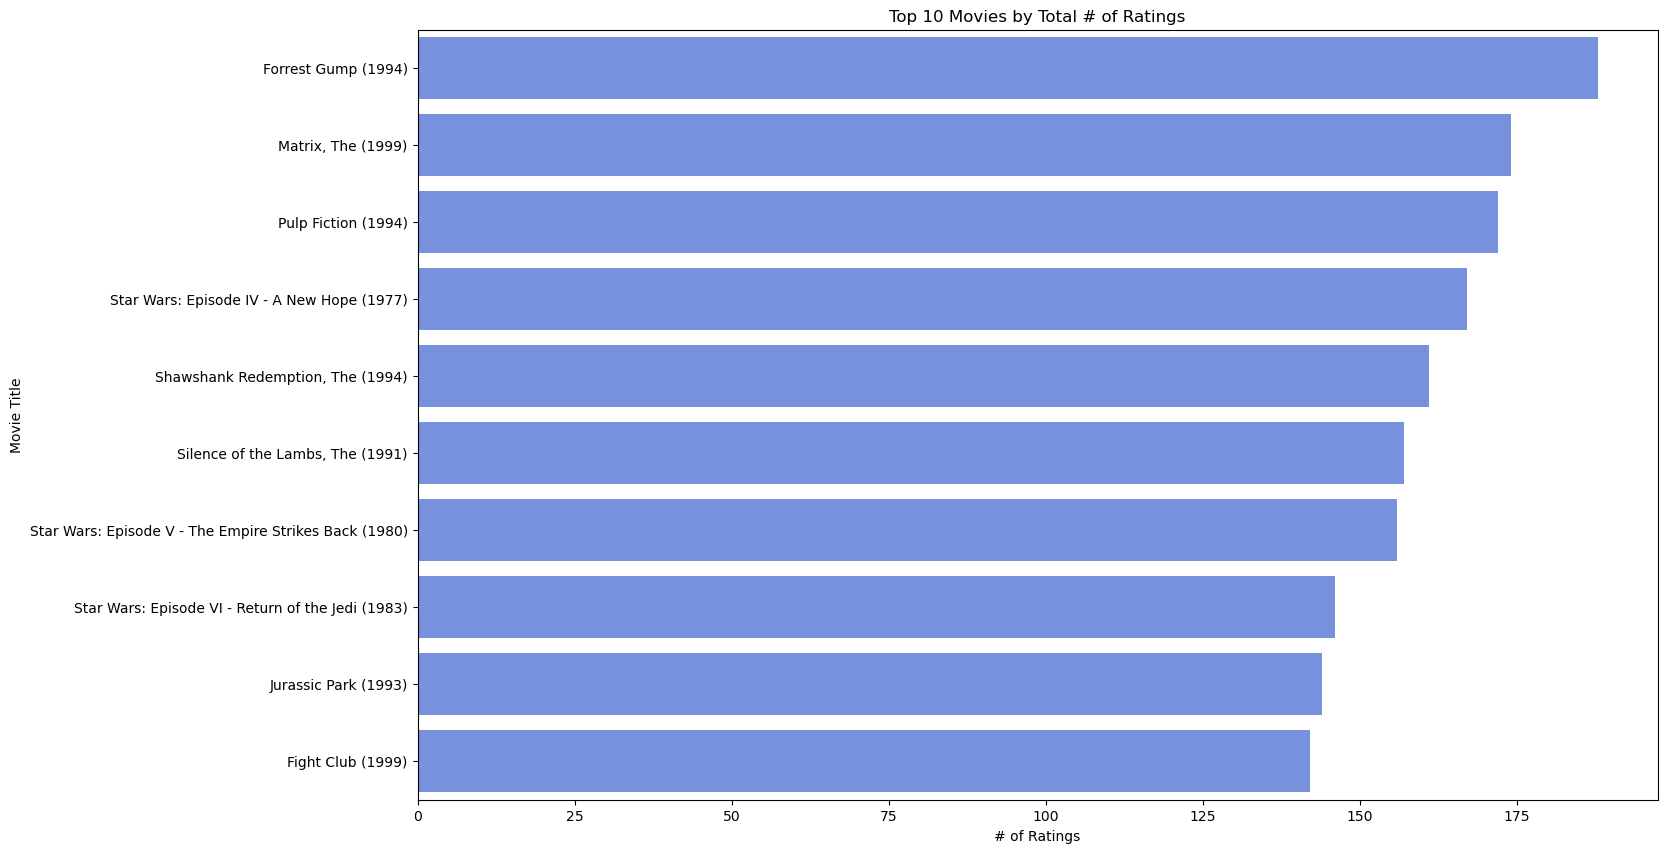

In [32]:
# visualize movies with the highest number of ratings
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Top 10 Movies by Total # of Ratings')


bp = sns.barplot(data=movie_chrt_cnt.head(10), 
            y='title',
            x='rating_cnt',
            color=pal[5]
            )

bp.set_ylabel('Movie Title')
bp.set_xlabel('# of Ratings');

They don't make them like they used to -- a number of movies from the 90's here showing the highest number of ratings.  Might be something to look into with more time is the demographics of our users.  Were they a certain age, which predisposed them to these movies at these points in time?  Let's also take a look at the movies with the fewest number of ratings.


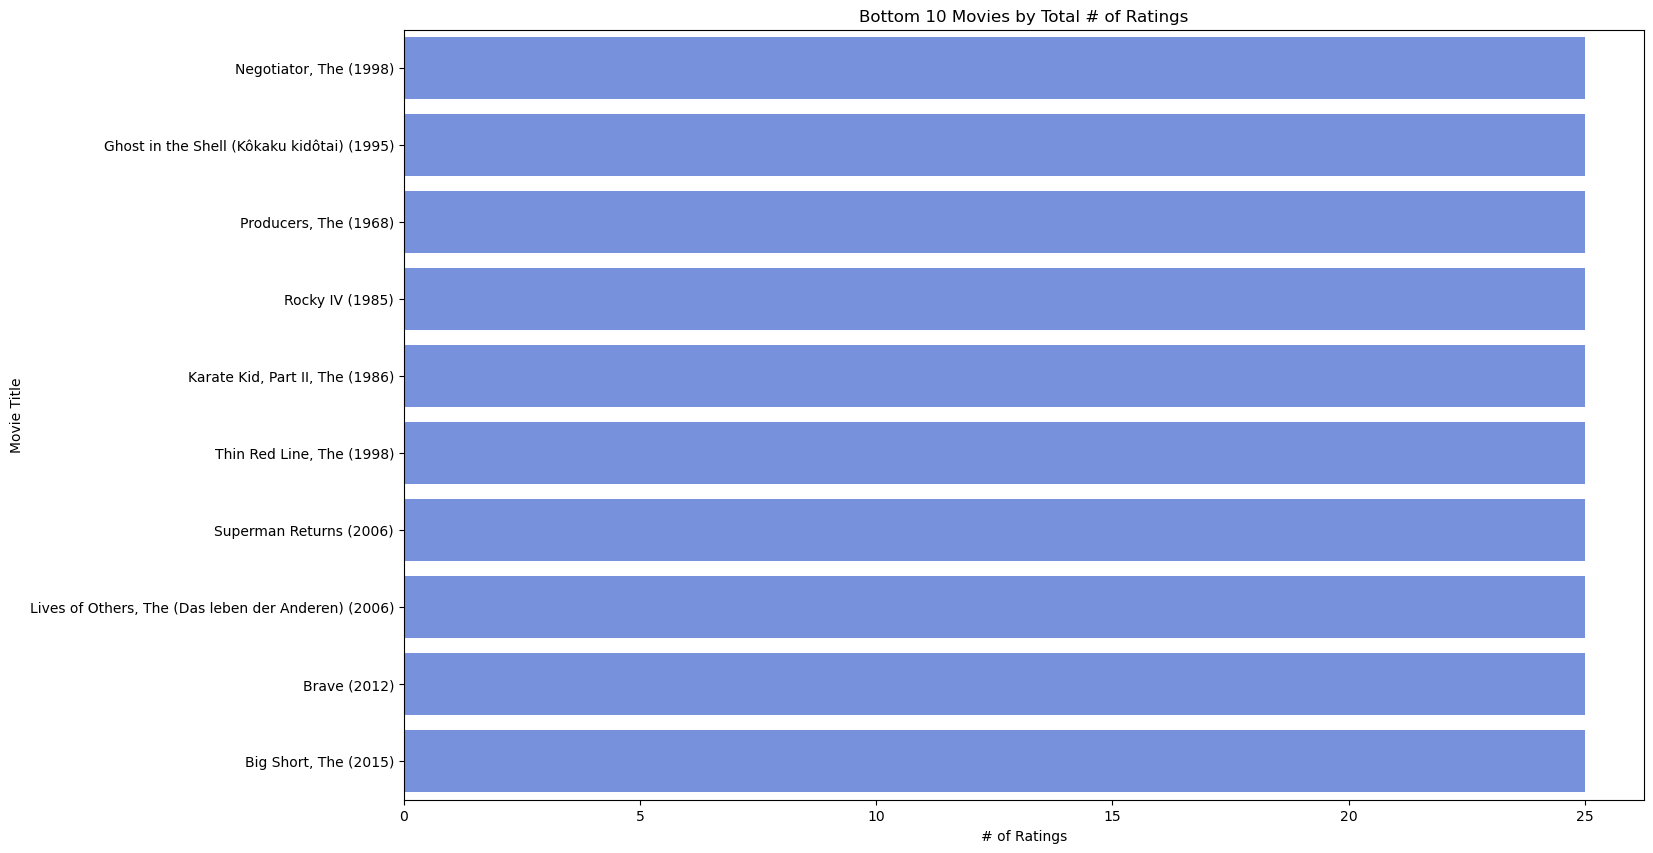

In [33]:
# visualize movies with the highest number of ratings
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Bottom 10 Movies by Total # of Ratings')


bp = sns.barplot(data=movie_chrt_cnt.tail(10), 
            y='title',
            x='rating_cnt',
            color=pal[5]
            )

bp.set_ylabel('Movie Title')
bp.set_xlabel('# of Ratings');

Well, I have only seen a few of these movies.  So needless to say, they probably didn't reach a level of popularity, which could be an indication of quality.  Maybe not.  Either way, here are the movies with the fewest number of ratings.

In [34]:
# now let's sort by average rating desc
movie_chrt_avg_rating = (
    data
    .groupby(['movieId', 'title'])
    .agg(avg_rating=('rating','mean'),
         rating_cnt=('rating','count'))
    .reset_index()
    .sort_values(by='avg_rating', ascending=False)
    )

movie_chrt_avg_rating.head(10)

,movieId,title,avg_rating,rating_cnt
69,318,"Shawshank Redemption, The (1994)",4.428571,161
255,1272,Patton (1970),4.400000,25
160,858,"Godfather, The (1972)",4.329457,129
218,1204,Lawrence of Arabia (1962),4.328947,38
242,1252,Chinatown (1974),4.275510,49
211,1196,Star Wars: Episode V - The Empire Strikes Back...,4.272436,156
384,2160,Rosemary's Baby (1968),4.258621,29
164,904,Rear Window (1954),4.253731,67
167,912,Casablanca (1942),4.253086,81
57,260,Star Wars: Episode IV - A New Hope (1977),4.251497,167


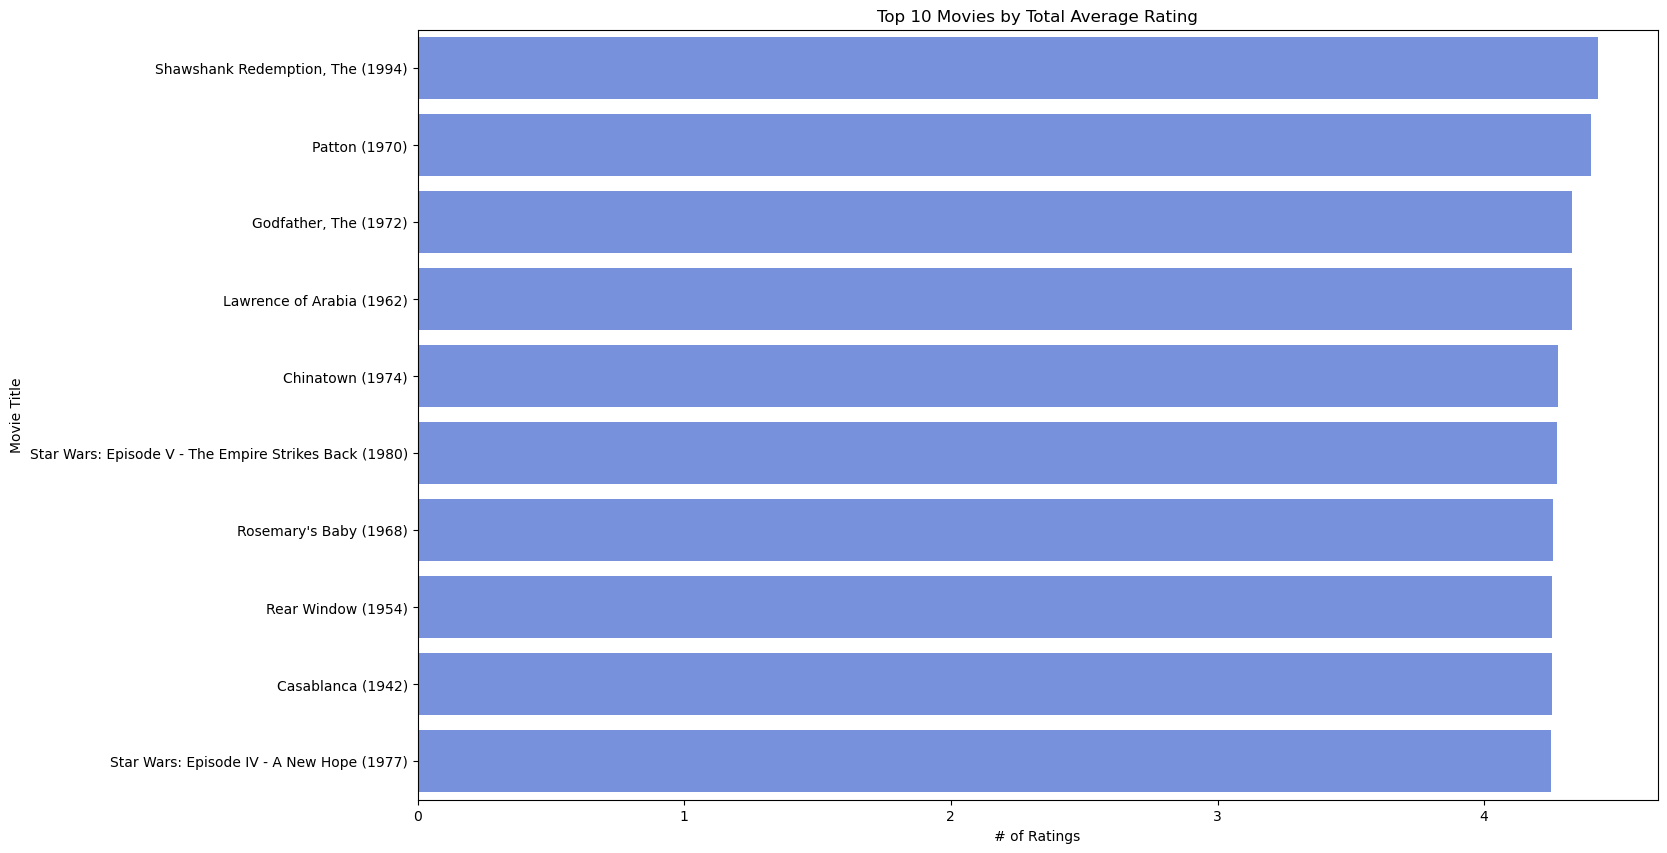

In [35]:
# visuzlize top 10 rated titles
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Top 10 Movies by Total Average Rating')


bp = sns.barplot(data=movie_chrt_avg_rating.head(10), 
            y='title',
            x='avg_rating',
            color=pal[5]
            )

bp.set_ylabel('Movie Title')
bp.set_xlabel('# of Ratings');

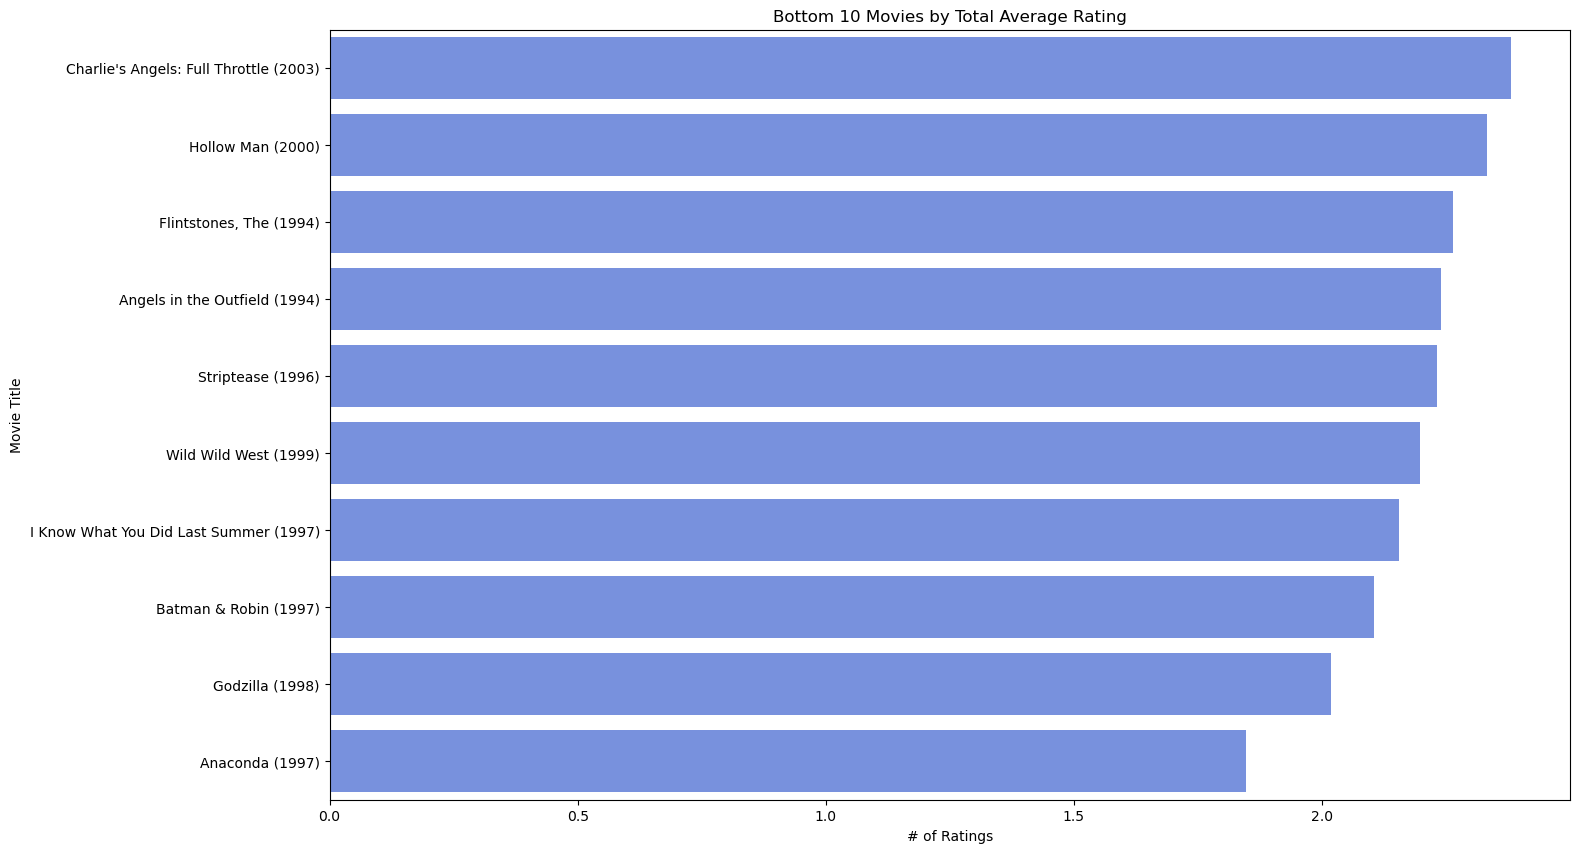

In [36]:
# let's sort ascending and look at the lowest rated movies
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Bottom 10 Movies by Total Average Rating')


bp = sns.barplot(data=movie_chrt_avg_rating.tail(10), 
            y='title',
            x='avg_rating',
            color=pal[5]
            )

bp.set_ylabel('Movie Title')
bp.set_xlabel('# of Ratings');

I think I have seen at least 2-3 of these movies in the theatres.  Give me a break I was in middle school at the time they were released.  The good news is that there is still a good distribution of movies from the mid 90s that were at the top of this list, and at the bottom of the list.

In [37]:
# let's take a quick look at our distribution of genres
genrelabels = set()
for i in data['genres'].str.split('|').values:
    genrelabels = genrelabels.union(set(i))

In [38]:
# let's take a look at our lables
genrelabels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [39]:
# function that counts how many movies there are of each genre 
def genrecounts(df, col, labels):
    count = dict()
    for i in labels: count[i] = 0
    for value in df[col].str.split('|'):
        if type(value) == float and pd.isnull(value): continue
        for i in value: 
            if pd.notnull(i): count[i] += 1
    return count       

In [40]:
# apply the genrecounts formula to our dataset and print the resulting genres and their counts 
genre_count = genrecounts(data, 'genres', genrelabels)
genre_count

{'Adventure': 14025,
 'Musical': 2164,
 'War': 2483,
 'Children': 4653,
 'Western': 922,
 'Animation': 3534,
 'Film-Noir': 385,
 'IMAX': 2427,
 'Fantasy': 6638,
 'Comedy': 17840,
 'Thriller': 13217,
 'Horror': 2943,
 'Romance': 8140,
 'Documentary': 161,
 'Action': 16902,
 'Drama': 17932,
 'Crime': 8755,
 'Mystery': 3967,
 'Sci-Fi': 9851}

In [41]:
# create a dataframe for the genres and their value counts 
genres = pd.DataFrame(list(genre_count.items()),columns = ['Genre','Frequency'])

genres_chrt = genres.sort_values(['Frequency'], ascending=False)

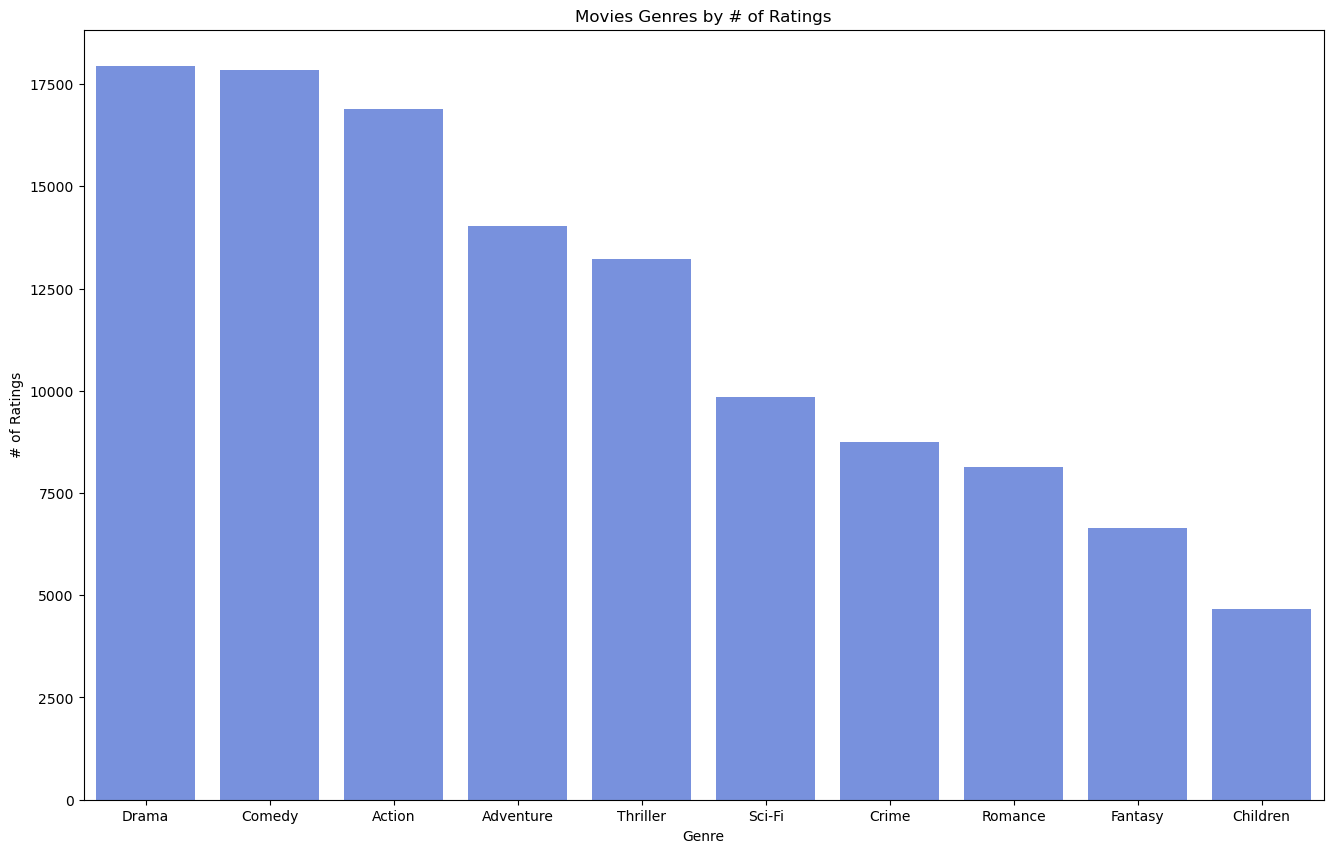

In [42]:
# let's sort ascending and look at the lowest rated movies
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Movies Genres by # of Ratings')

bp = sns.barplot(data=genres_chrt.head(10), 
            y='Frequency',
            x='Genre',
            color=pal[5]
            )

bp.set_ylabel('# of Ratings')
bp.set_xlabel('Genre');

Our top 3 genres are Comedy, dramas, and action.  Which makes sense to me. Not sure what IMAX will necessarily get us from a genre perspective.  That seems more like a method to watch a movie rather than a genre itself.  I am intentionally not going to worry about it at this point in time.

# Recommendation Model

In [43]:
# let's take a look at our dataframe again to make sure we're still working with the values we want!
data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [44]:
# trimming down our dataframe for modelling
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46270 entries, 0 to 100803
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   46270 non-null  int64  
 1   movieId  46270 non-null  int64  
 2   rating   46270 non-null  float64
 3   title    46270 non-null  object 
 4   genres   46270 non-null  object 
 5   year     46270 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


Looking good.  Our dataset includes all the information we need for both the content and collaborative based recommendation systems.  Also notice that we are using a subset of data to do our training and testing on, in which we will make recommendations.

## Genre content based system

A content based system will provide recomemndations based on item similarity alone.  This type of modelling can help us alleviat the cold start problem where we may not have ratings for a user out of the gate.

In [45]:
# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['genres'])

In [46]:
# calculate pairwise cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [47]:
movie_index = data[data['movieId'] == 1].index[0]

In [48]:
# function to get top similar items based on cosine similarity
def get_content_recommendations_items(movie_id, top_n=5):
    # get the index of the movie in the dataframe
    movie_index = data[data['movieId'] == movie_id].index[0]
    
    # get the similarity scores for the movie
    similarity_scores = cosine_similarities[movie_index]
    
    # exclude the current movie from the similarity scores
    similarity_scores[movie_index] = 0
    
    # get the indices of the top similar movies
    top_indices = similarity_scores.argsort()[::-1]
    
    # initialize a set to keep track of recommended movie IDs
    recommended_movies = set()
    
    # iterate over the top indices and add unique movie IDs to the set
    for idx in top_indices:
        movie_id = data.iloc[idx]['movieId']
        if movie_id not in recommended_movies:
            recommended_movies.add(movie_id)
            if len(recommended_movies) == top_n:
                break
    
    return list(recommended_movies)

In [49]:
# example usage for Toy Story
movie_id = 1
similar_movies = get_content_recommendations_items(movie_id)
print("Similar movies to movie", movie_id, ":")
for movie_id in similar_movies:
    print(movie_id, data[data['movieId'] == movie_id]['title'].values[0])

Similar movies to movie 1 :
1 Toy Story (1995)
3114 Toy Story 2 (1999)
4016 Emperor's New Groove, The (2000)
4886 Monsters, Inc. (2001)
2294 Antz (1998)


This is a pretty crude recommendation system.  And really lends itself to more of a filtering technique vs a more intelligent recommendation engine.  So for instance if a user is interested in Toy Story then we would also provide them with this list of movies as a potential starting point.  Right now we are only considering genre when looking at what movies we would like to recommend.  

We now will move on to our collaborative system, where we will use user to user similarity to predict what ratings for each movie we would expect from each user.  Then we can surface those movies base on the highest rated predictions.  Obviously you can see the issues with this approach, as we do have some odd recommendations based on the genre alone.

## Baseline SVD - Collaborative Based System

In [50]:
# paring down our data frame to only the fields we need
data = data[['userId', 'movieId', 'rating']]

In [51]:
# define the rating scale for surprise
reader = Reader(rating_scale=(0, 5))

In [52]:
# load data into the surprise format
df = Dataset.load_from_df(data, reader)

# split data into training and testing sets
train_data, test_data = train_test_split(df, 
                                         test_size=0.2, 
                                         random_state=42)

In [53]:
# print number of users and items in our test & train set
print('# of users in train set: ', train_data.n_users, '\n')
print('# of items in train set: ', train_data.n_items, '\n')


# of users in train set:  248 

# of items in train set:  907 



In [54]:
# train the model using SVD algorithm
algo1 = SVD()

#firt our model on our training data
algo1.fit(train_data)

In [55]:
# predict on the test set 
baselinepreds = algo1.test(test_data)

In [56]:
# check RMSE and MAE results 
accuracy.rmse(baselinepreds)
accuracy.mae(baselinepreds);

RMSE: 0.8367
MAE:  0.6413


Not a bad result for our baseline run!  We will move onto our cross validation and then summarize below.

In [57]:
# run 5-fold cross validation on the data and print results 
cv_baseline = cross_validate(algo1, 
                             df, 
                             measures=['RMSE', 'MAE'], 
                             cv=5, 
                             verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8285  0.8265  0.8260  0.8316  0.8086  0.8242  0.0081  
MAE (testset)     0.6349  0.6283  0.6324  0.6352  0.6167  0.6295  0.0069  
Fit time          0.16    0.15    0.15    0.16    0.16    0.16    0.00    
Test time         0.02    0.19    0.02    0.02    0.02    0.05    0.07    


In [58]:
# print out the RMSE score for each fold 
for i in cv_baseline.items():
    if i[0].startswith('test'):
        print(i[0], ':', i[1])
print('Mean RMSE:', np.mean(cv_baseline['test_rmse']))

test_rmse : [0.8285023  0.82646158 0.82600856 0.83160185 0.80862507]
test_mae : [0.63486333 0.62828185 0.63241911 0.63523859 0.61672353]
test_time : (0.018683195114135742, 0.1949470043182373, 0.017999887466430664, 0.019156932830810547, 0.0180361270904541)
Mean RMSE: 0.824239874432425


This is a pretty decent RMSE.  For example, our predictions are off roughly 0.83 on a scale of 0-5.  We will continue to iterate on this initial model to see if we can lower the score, but this baseline might be our winner take all.  The good news is that our cross validation is close to our rmse, giving us confidence in our initial result.  We will continue to move forward with this baseline and tune the model to see if we can gain any improvement

## Tuned Baseline SVD - Collaborative Based System

In [59]:
# set parameters for GridSearch on SVD model 
parameters = {'n_factors': [50, 80, 100], #default is 100
             'reg_all': [.02, .04, .06], #default is .02
             'n_epochs': [10, 20, 30], #default is 20
             'lr_all': [.002, .005, .01]} #default is .005

gridsvd = GridSearchCV(SVD, parameters, n_jobs=-1)

In [60]:
# fit SVD model on data
gridsvd.fit(df)

In [61]:
# print out optimal parameters for SVD after GridSearch
print(gridsvd.best_score)
print(gridsvd.best_params)

{'rmse': 0.8056743552704934, 'mae': 0.61412302250106}
{'rmse': {'n_factors': 50, 'reg_all': 0.06, 'n_epochs': 30, 'lr_all': 0.01}, 'mae': {'n_factors': 100, 'reg_all': 0.06, 'n_epochs': 30, 'lr_all': 0.01}}


Our gridsearch yields that our default values for n_factors is the only default that was selected.  Let's see what these new values can do!

In [62]:
# reinstantiate the model with the best parameters fromGridSearch 
svdtuned = SVD(n_factors=100,
               reg_all=0.06,
               n_epochs=30,
               lr_all=0.01)

In [63]:
# fit and predict the model on both training and test data
svdpreds = svdtuned.fit(train_data).test(test_data)

In [64]:
# print RMSE and MAE results 
accuracy.rmse(svdpreds)
accuracy.mae(svdpreds);

RMSE: 0.8147
MAE:  0.6221


In [65]:
# run 5-fold cross validation on the data and print results 
cv_svd_tuned = cross_validate(svdtuned, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8190  0.8005  0.8026  0.8024  0.8094  0.8068  0.0068  
MAE (testset)     0.6254  0.6135  0.6095  0.6126  0.6150  0.6152  0.0054  
Fit time          0.23    0.23    0.23    0.21    0.21    0.22    0.01    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


In [66]:
# display the results for all 5-folds 
for i in cv_svd_tuned.items():
    print(i)

('test_rmse', array([0.81897665, 0.80045002, 0.80260818, 0.80240869, 0.80944644]))
('test_mae', array([0.62537436, 0.61354051, 0.60951583, 0.61259032, 0.61497835]))
('fit_time', (0.22576093673706055, 0.22733306884765625, 0.23034906387329102, 0.2130119800567627, 0.21193814277648926))
('test_time', (0.018000125885009766, 0.017962932586669922, 0.018513917922973633, 0.01678180694580078, 0.016731977462768555))


In [67]:
# print out the average RMSE score for the test set
np.mean(cv_svd_tuned['test_rmse'])

0.8067779967461565

In [68]:
# print out the RMSE score for each fold 
for i in cv_svd_tuned.items():
    if i[0].startswith('test'):
        print(i[0], ':', i[1])
print('Mean RMSE:', np.mean(cv_svd_tuned['test_rmse']))

test_rmse : [0.81897665 0.80045002 0.80260818 0.80240869 0.80944644]
test_mae : [0.62537436 0.61354051 0.60951583 0.61259032 0.61497835]
test_time : (0.018000125885009766, 0.017962932586669922, 0.018513917922973633, 0.01678180694580078, 0.016731977462768555)
Mean RMSE: 0.8067779967461565


Our error rate improved!  Only a few points, but an improvement none the less.  Our benchmarks now for remaining models will be .80 RMSE on our test set, and .80 mean RMSE on our cross validation.

## Algorithm 2 KNNBasic - Collaborative Based System

In [69]:
# set parameters to be used in KNN models 
knn_params = {'name': ['cosine', 'pearson'],
             'user_based':[True, False], #default is True, compute similarities between users
             'min_support':[True, False],
             'min_k' : [1, 2, 5]} #default is 1

knnb = GridSearchCV(KNNBasic, knn_params, n_jobs=-1)

In [70]:
#fit our model
knnb.fit(df)

In [71]:
# display the best scores and parameters from GridSearch
print(knnb.best_score)
print(knnb.best_params)

{'rmse': 0.8834104586164276, 'mae': 0.6762870278396091}
{'rmse': {'name': 'cosine', 'user_based': True, 'min_support': True, 'min_k': 1}, 'mae': {'name': 'cosine', 'user_based': True, 'min_support': True, 'min_k': 1}}


Well it looks like our tuned kNNBasic model is performing pretty well.  Maybe a little too good.  Let's continue through the process and evaluate at the end.

In [72]:
# reinstantiate the KNN model with the best parameters from GridSearch 
knnb_tuned = KNNBasic(sim_options={'name': 'cosine', 
                                       'user_based': True, 
                                       'min_support':True, 
                                       'min_k':1})

In [73]:
# train our optimized model on our training data
knnbpreds = knnb_tuned.fit(train_data).test(test_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [74]:
# check RMSE and MAE results 
accuracy.rmse(knnbpreds)
accuracy.mae(knnbpreds);

RMSE: 0.9118
MAE:  0.7022


In [75]:
# run 5-fold cross validation on the data and print results 
cv_knnb = cross_validate(knnb_tuned, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9130  0.9166  0.9120  0.9149  0.9033  0.9120  0.0046  
MAE (testset)     0.6991  0.7015  0.7050  0.7030  0.6938  0.7005  0.0039  
Fit time          0.01    0.02    0.01    0.01    0.02    0.01    0.00    
Test time         0.22    0.20    0.20    0.21    0.21    0.21    0.01    


In [76]:
# print out the RMSE score for each fold 
for i in cv_knnb.items():
    if i[0].startswith('test'):
        print(i[0], ':', i[1])
print('Mean RMSE:', np.mean(cv_knnb['test_rmse']))

test_rmse : [0.91296468 0.91660906 0.91197373 0.91494027 0.90326884]
test_mae : [0.69914707 0.70147656 0.70495823 0.70298928 0.6937579 ]
test_time : (0.21988773345947266, 0.20470094680786133, 0.20427584648132324, 0.21023273468017578, 0.21266818046569824)
Mean RMSE: 0.9119513160750179


Well this is performing worse than our baseline (on test data .80 vs .91).  SVD can effectively capture latent factors or dimensions in the user-item interaction matrix. By decomposing the matrix into lower-dimensional representations, SVD can capture underlying patterns and relationships in the data. This allows SVD to make accurate predictions even in the presence of sparsity and noise.  SVD can handle the cold start problem better than KNNBasic as well. The cold start problem occurs when there is limited information available for new users or items with few interactions. SVD can still make predictions based on the learned latent factors, while KNNBasic requires a sufficient number of neighbors to make reliable predictions. Let's try another kNN model.

## Algorithm 3 KNNMeans - Collaborative Based System

In [77]:
# apply GridSearch to the KNNWithMeans model 
knnm_tuned = GridSearchCV(KNNWithMeans, 
                          knn_params, 
                          measures=['rmse', 'mae'], 
                          cv=5)
# fit our model
knnm_tuned.fit(df)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [78]:
# display the best scores and parameters from GridSearch
print(knnm_tuned.best_score)
print(knnm_tuned.best_params);

{'rmse': 0.8282083088352257, 'mae': 0.6320644252468401}
{'rmse': {'name': 'cosine', 'user_based': True, 'min_support': True, 'min_k': 1}, 'mae': {'name': 'cosine', 'user_based': True, 'min_support': True, 'min_k': 1}}


In [79]:
# reinstantiate the KNN model with the best parameters from GridSearch 
knnm_tuned = KNNWithMeans(sim_options={'name': 'cosine', 
                                       'user_based': True, 
                                       'min_support':True, 
                                       'min_k':1})

In [80]:
# train our optimized model on our training data
knnmpreds = knnm_tuned.fit(train_data).test(test_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [81]:
# check RMSE and MAE results 
accuracy.rmse(knnmpreds)
accuracy.mae(knnmpreds);

RMSE: 0.8371
MAE:  0.6424


In [82]:
# run 5-fold cross validation on the data and print results 
cv_knnm = cross_validate(knnm_tuned, 
                         df, 
                         measures=['RMSE', 'MAE'], 
                         cv=5, 
                         verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8383  0.8295  0.8260  0.8315  0.8237  0.8298  0.0050  
MAE (testset)     0.6379  0.6321  0.6298  0.6356  0.6351  0.6341  0.0029  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.24    0.23    0.23    0.23    0.23    0.23    0.00    


In [83]:
# print out the RMSE score for each fold 
for i in cv_knnm.items():
    if i[0].startswith('test'):
        print(i[0], ':', i[1])
print('Mean RMSE:', np.mean(cv_knnm['test_rmse']))

test_rmse : [0.83825779 0.82954508 0.82598233 0.83150503 0.82368478]
test_mae : [0.63793679 0.63205163 0.62979882 0.63564198 0.63512282]
test_time : (0.23736190795898438, 0.23401904106140137, 0.23313403129577637, 0.23253107070922852, 0.2328321933746338)
Mean RMSE: 0.8297950029884609


Ok -- so this model performed better than our kNNBasic model.  kNNMeans takes into account the mean ratings of users or items when computing similarities. By subtracting the mean rating from each rating, it effectively normalizes the data, reducing the impact of users or items with different rating scales or biases. In addition, by considering the mean ratings, it can account for overall trends or biases in the data. This can help in situations where users or items have consistently higher or lower ratings.  And last but not least kNNMeans can handle sparse data better than KNNBasic. When dealing with sparse datasets, where there are many missing values or a limited number of interactions per user or item, KNNMeans can leverage the mean ratings to make predictions. This can help in situations where there is limited information available for nearest neighbors, improving the stability and accuracy of recommendations.

## Algorithm 4 NMF - Collaborative Based System

In [84]:
# set parameters for GridSearch on NMF model 
param_grid = {'n_factors': [50, 100],
              'n_epochs': [20, 30],
              'biased': [True, False],
              'reg_pu': [0.06, 0.1],
              'reg_qi': [0.06, 0.1],
              'reg_bu': [0.02, 0.1],
              'reg_bi': [0.02, 0.1]}


# grid search to find optimal model using SVD++ algorithm
nmf = GridSearchCV(NMF, 
                   param_grid, 
                   measures=['rmse', 'mae'], 
                   cv=5)

In [85]:
# fit nmf model on data
nmf.fit(df)

In [86]:
# print out optimal parameters for nmf after GridSearch
print(nmf.best_score)
print(nmf.best_params)

{'rmse': 0.9351606652008166, 'mae': 0.7017866542746691}
{'rmse': {'n_factors': 50, 'n_epochs': 30, 'biased': False, 'reg_pu': 0.1, 'reg_qi': 0.1, 'reg_bu': 0.1, 'reg_bi': 0.02}, 'mae': {'n_factors': 50, 'n_epochs': 30, 'biased': False, 'reg_pu': 0.1, 'reg_qi': 0.1, 'reg_bu': 0.1, 'reg_bi': 0.02}}


In [87]:
# reinstantiate the model with the best parameters from GridSearch 
nmftuned = NMF(n_factors=50,
               n_epochs=30,
               biased=False,
               reg_pu=0.1,
               reg_qi=0.1,
               reg_bu=0.1,
               reg_bi=0.02)

In [88]:
# fit and predict the model 
nmfpreds = nmftuned.fit(train_data).test(test_data)

In [89]:
# print RMSE and MAE results 
accuracy.rmse(nmfpreds)
accuracy.mae(nmfpreds);

RMSE: 0.9500
MAE:  0.7131


In [90]:
# run 5-fold cross validation on the data and print results 
cv_nmf_tuned = cross_validate(nmftuned, 
                              df, 
                              measures=['RMSE', 'MAE'], 
                              cv=5, 
                              verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9543  0.9338  0.9386  0.9344  0.9329  0.9388  0.0080  
MAE (testset)     0.7189  0.7038  0.7064  0.6991  0.6948  0.7046  0.0082  
Fit time          0.21    0.22    0.21    0.21    0.21    0.21    0.00    
Test time         0.01    0.01    0.01    0.07    0.01    0.02    0.02    


In [91]:
# display the results for all 3-folds 
for i in cv_nmf_tuned.items():
    print(i)

('test_rmse', array([0.95433788, 0.93384957, 0.93863319, 0.93441104, 0.93291211]))
('test_mae', array([0.71885121, 0.70384464, 0.7064067 , 0.69908239, 0.69476151]))
('fit_time', (0.21426820755004883, 0.21527409553527832, 0.20873308181762695, 0.20841503143310547, 0.21065497398376465))
('test_time', (0.014331817626953125, 0.014475822448730469, 0.01435089111328125, 0.06583595275878906, 0.01432490348815918))


In [92]:
# print out the average RMSE score for the test set
np.mean(cv_nmf_tuned['test_rmse'])

0.9388287586561331

In [93]:
# print out the RMSE score for each fold 
for i in cv_nmf_tuned.items():
    if i[0].startswith('test'):
        print(i[0], ':', i[1])
print('Mean RMSE:', np.mean(cv_nmf_tuned['test_rmse']))

test_rmse : [0.95433788 0.93384957 0.93863319 0.93441104 0.93291211]
test_mae : [0.71885121 0.70384464 0.7064067  0.69908239 0.69476151]
test_time : (0.014331817626953125, 0.014475822448730469, 0.01435089111328125, 0.06583595275878906, 0.01432490348815918)
Mean RMSE: 0.9388287586561331


Another model around .91, looks like our baseline is still the most efficient at providing the best suggestion to users.

## Modeling Summary


In [94]:
# create a dictionary for each models' results 
baseline_svd_result = {'model': 'baseline_svd','RMSE': accuracy.rmse(baselinepreds), 
                       'MAE': accuracy.mae(baselinepreds), 
                       'CV': np.mean(cv_baseline['test_rmse'])}

svd_tuned_result = {'model':'svd_tuned', 
                    'RMSE': accuracy.rmse(svdpreds), 
                    'MAE': accuracy.mae(svdpreds), 
                    'CV': np.mean(cv_svd_tuned['test_rmse'])}

knnb_tuned_result = {'model':'knnbasic',
                     'RMSE': accuracy.rmse(knnbpreds), 
                     'MAE': accuracy.mae(knnbpreds), 
                     'CV': np.mean(cv_knnb['test_rmse'])}

knnm_tuned_result = {'model':'knnmeans',
                     'RMSE': accuracy.rmse(knnmpreds), 
                     'MAE': accuracy.mae(knnmpreds), 
                     'CV': np.mean(cv_knnm['test_rmse'])}

nmf_tuned_result = {'model':'nmf',
                    'RMSE': accuracy.rmse(nmfpreds), 
                    'MAE': accuracy.mae(nmfpreds), 
                    'CV': np.mean(cv_nmf_tuned['test_rmse'])}

RMSE: 0.8367
MAE:  0.6413
RMSE: 0.8147
MAE:  0.6221
RMSE: 0.9118
MAE:  0.7022
RMSE: 0.8371
MAE:  0.6424
RMSE: 0.9500
MAE:  0.7131


In [95]:
# combine all the results into a list 
result_list = [baseline_svd_result, svd_tuned_result, knnb_tuned_result, knnm_tuned_result, nmf_tuned_result]

In [96]:
# transform the results lists into a DataFrame 
df_results_updated = pd.DataFrame.from_dict(result_list, orient='columns')
df_results_updated = df_results_updated.set_index('model')

In [97]:
# display the results for all of the models 
df_results_updated.sort_values(by='RMSE')

,RMSE,MAE,CV
model,,,
svd_tuned,0.814674,0.622111,0.806778
baseline_svd,0.836683,0.641286,0.824240
knnmeans,0.837140,0.642421,0.829795
knnbasic,0.911832,0.702170,0.911951
nmf,0.950016,0.713064,0.938829


Our tuned SVD model has the lowest RMSE and MAE, indicating that it performs the best in terms of accuracy among the evaluated models.  When evaluating our 5-fold cross validated results, our tuned SVD model again has the lowest CV, indicating consistent and good performance across different iterations.  The RMSE measures the average difference between the predicted ratings and the actual ratings in the test set.  With a rating scale of 0 to 5, an RMSE of 0.80 indicates that, on average, the predicted ratings are off by approximately 0.80 units from the actual ratings. This suggests that the recommendation system is making reasonably accurate predictions.  

With that being said, and in addition to our scores, and comparisons, it is also important to get feedback from the users to indicate whether or not the predictions are providing value.

## Make Collaborative Recommendations

In [98]:
# make collaborative recommendations for a user
user_id = 205
items = data_clean['movieId'].unique()
user_items = [(user_id, item) for item in items]
user_ratings = pd.DataFrame(user_items, columns=['userId', 'movieId'])
user_ratings['rating'] = user_ratings.apply(lambda row: svdtuned.predict(row['userId'], row['movieId']).est, axis=1)
recommendations = user_ratings.sort_values(by='rating', ascending=False)[:10]['movieId'].tolist()

In [99]:
# quick look at what we predicted
predict_205 = pd.DataFrame(user_ratings[user_ratings['userId'] == 205])
actual_205 = pd.DataFrame(data_clean[data_clean['userId'] == 205])

user_205_recommend_clean = pd.merge(
    predict_205,
    actual_205,
    how="inner",
    on='movieId',
    suffixes=('_predicted', '_actual'))

user_205_recommend_clean = user_205_recommend_clean[['title', 'rating_predicted', 'rating_actual']]
user_205_recommend_clean

,title,rating_predicted,rating_actual
0,Star Wars: Episode IV - A New Hope (1977),4.141640,4.5
1,Forrest Gump (1994),4.036885,4.0
2,Full Metal Jacket (1987),4.054787,3.5
3,Spaceballs (1987),3.525642,4.0
4,Kill Bill: Vol. 1 (2003),3.934257,4.5
5,Inglourious Basterds (2009),4.034785,4.0
6,Django Unchained (2012),3.885063,4.5
7,Casablanca (1942),4.263508,2.5
8,Harry Potter and the Sorcerer's Stone (a.k.a. ...,3.691410,4.5
9,Harry Potter and the Chamber of Secrets (2002),3.445070,3.5


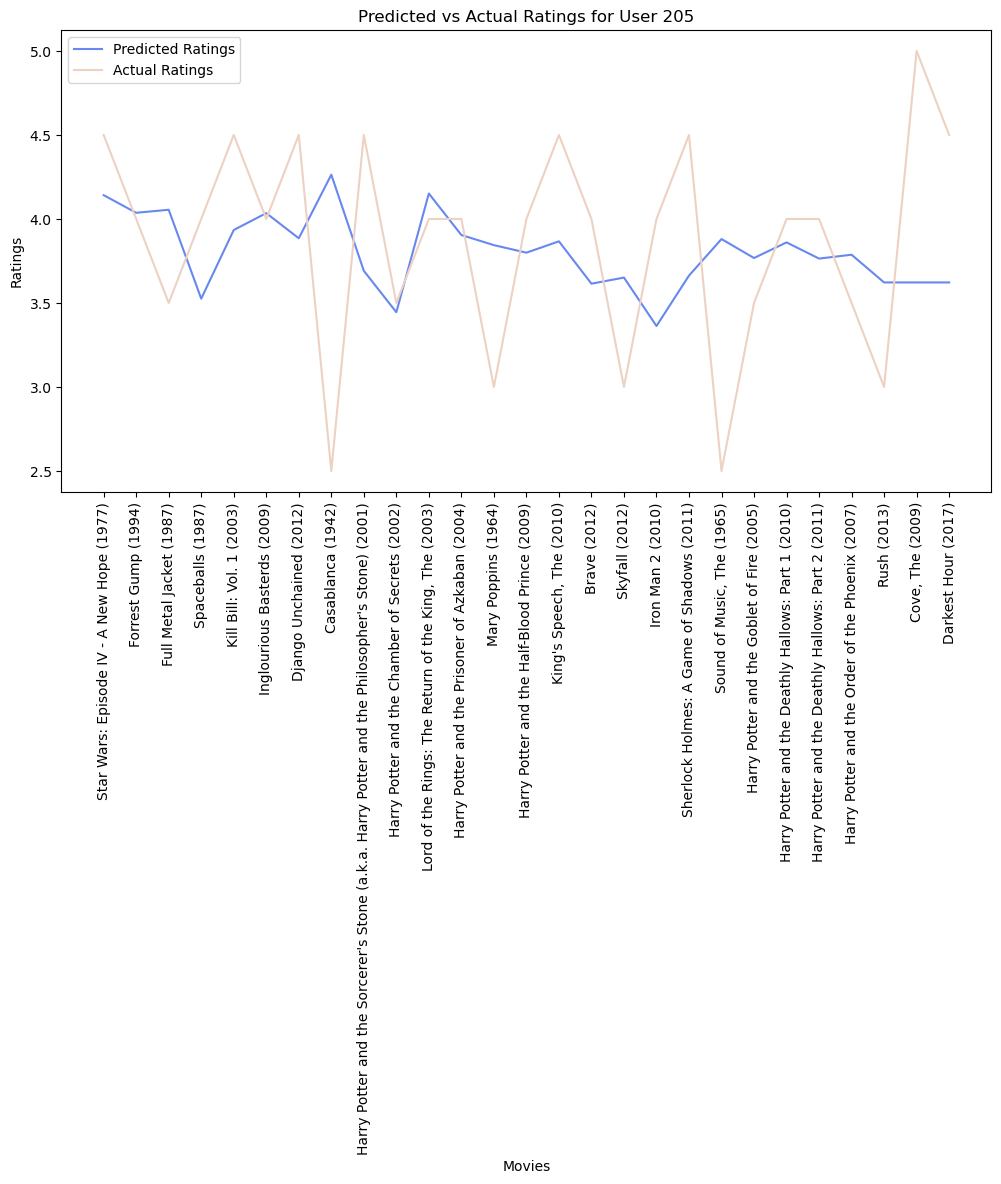

In [100]:
# create visual for sample user
plt.figure(figsize=(12, 6))
sns.lineplot(data=user_205_recommend_clean, 
             x='title', 
             y='rating_predicted', 
             label='Predicted Ratings',
            color=pal[5])

sns.lineplot(data=user_205_recommend_clean, 
             x='title', 
             y='rating_actual', 
             label='Actual Ratings',
            color=pal[2])

# set the labels and title
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.title('Predicted vs Actual Ratings for User 205')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

Broadly speaking again these predicted ratings against the orginal ratings look pretty decent.  There are some that are off, but within a threshold of what we were thinking with our RMSE result of 0.80. I think this would definitely be a good starting point for our alogrithm.  I think an additional step we could take though is to look at obtaining "brief" ratings from our new users in order to seed their experience.  That way, in addition to the content based, and the collaborative based systems, we can then provide some recommendations regardless of if the user is new or returning.  The following code was adapted from a project that I found online.

## Obtain Ratings From New Users

So in addition to our first few models for our recommender, we want to seed any new users with content based on some initial feedback / ratings.  This system will ask a new user to rate 5 movies.  We will then append that data to our overall predictions list, rerun our SVD tuned model, and provide recommendations based off of that new data.  This code was adopted from another MovieLens Recommender project located here -- https://github.com/adinas94/MovieLens-Recommendation-System.

In [101]:
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movies[movies['genres'].str.contains(genre)].sample(1)
        else:
            movie = movies.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list      

In [102]:
# try out the new function here!
user_rating = movie_rater(movies, 5, 'Comedy')

      movieId                                  title         genres
1619     2163  Attack of the Killer Tomatoes! (1978)  Comedy|Horror
How do you rate this movie on a scale of 1-5, press n if you have not seen :
1
      movieId            title  genres
6559    55020  Ten, The (2007)  Comedy
How do you rate this movie on a scale of 1-5, press n if you have not seen :
2
      movieId                                              title  genres
8118   101072  Unintentional Kidnapping of Mrs. Elfriede Ott,...  Comedy
How do you rate this movie on a scale of 1-5, press n if you have not seen :
3
      movieId                        title        genres
8152   102165  English Teacher, The (2013)  Comedy|Drama
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4
      movieId                title                 genres
9454   167790  The Good Boy (2016)  Children|Comedy|Drama
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5


In [103]:
# view ratings
user_rating

[{'userId': 1000, 'movieId': 2163, 'rating': '1'},
 {'userId': 1000, 'movieId': 55020, 'rating': '2'},
 {'userId': 1000, 'movieId': 101072, 'rating': '3'},
 {'userId': 1000, 'movieId': 102165, 'rating': '4'},
 {'userId': 1000, 'movieId': 167790, 'rating': '5'}]

In [104]:
# add the new ratings to the original ratings DataFrame
new_ratings_df = data.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

/var/folders/s8/hk0kxcr16nd9ymn3d5qp95900000gn/T/ipykernel_63825/2464078773.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_ratings_df = data.append(user_rating,ignore_index=True)


In [105]:
# train a model using the new combined DataFrame
svdtuned.fit(new_data.build_full_trainset())

In [106]:
# make predictions for the user list of tuples in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in data['movieId'].unique():
    list_of_movies.append( (m_id,svdtuned.predict(1000,m_id)[3]))

In [107]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

In [108]:
# return the top 5 recommendations -- # of recs can be customized
def recommended_movies(user_ratings, movie_title_df, n):
    for idx, rec in enumerate(user_ratings):
        title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0]), 'title'].values[0]
        print('Recommendation #', idx + 1, ':', title)
        n -= 1
        if n == 0:
            break

recommended_movies(ranked_movies, data_clean, 5)


Recommendation # 1 : Blade Runner (1982)
Recommendation # 2 : Silence of the Lambs, The (1991)
Recommendation # 3 : Star Wars: Episode IV - A New Hope (1977)
Recommendation # 4 : Star Wars: Episode VI - Return of the Jedi (1983)
Recommendation # 5 : Wallace & Gromit: A Close Shave (1995)


# Create Final Predictions Dataframe

Next we will create a dataframe to include our estimated ratings for each combination.  We can then run some additional EDA to see how well we are performing.

In [109]:
# create list of unique userIds and movieIds 
userids = new_ratings_df['userId'].unique()
movieids = new_ratings_df['movieId'].unique()

In [110]:
# create a list and append the userId, movieId, and estimated ratings 
predictions = [] 
for u in userids:
    for m in movieids:
        predicted = svdtuned.predict(u, m)
        predictions.append([u, m, predicted[3]])

In [111]:
# convert the list to a dataframe
predicted = pd.DataFrame(predictions)

In [112]:
# rename columns of DataFrame 
predicted.rename(columns={0: 'userId', 
                          1: 'movieId', 
                          2:'estimatedrating'}, 
                 inplace=True)

In [113]:
#Print the final dataFrame
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227088 entries, 0 to 227087
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           227088 non-null  int64  
 1   movieId          227088 non-null  int64  
 2   estimatedrating  227088 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.2 MB


In [114]:
# pulling together all predictions, and all ratings where applicable
recommend_clean_inner = pd.merge(
    predicted,
    data_clean,
    how="inner",
     on=['userId', 'movieId'],
    suffixes=('_predicted', '_actual'))

recommend_clean = recommend_clean_inner[['title', 'userId', 'estimatedrating', 'rating']]
recommend_clean

,title,userId,estimatedrating,rating
0,Toy Story (1995),1,4.450050,4.0
1,Grumpier Old Men (1995),1,4.033526,4.0
2,Heat (1995),1,4.378022,4.0
3,Seven (a.k.a. Se7en) (1995),1,4.696980,5.0
4,"Usual Suspects, The (1995)",1,4.622514,5.0
...,...,...,...,...
46274,Elf (2003),610,3.927564,3.5
46275,Evil Dead II (Dead by Dawn) (1987),610,4.463258,5.0
46276,Underworld (2003),610,3.576719,3.0
46277,Harold and Kumar Go to White Castle (2004),610,3.650304,4.0


Now we have all of our predictions and ratings in a single data frame.  We can now make this information available to the application developers to rank and show what movies are mos similar for each user.  Moving forward, I think there are additional things to keep in mind as we continue to tune and reifne our model:

1. A/B testing between users without the recommendations, and users with the recommendations to measure engagement.
2. Continue to evaluate content recommendation model to improve hybrid approach (tags/ descriptions)
3. Work with software dev/engineering to implement initial rating capture for new users


We can also do some A/B testing to understand between a control population with no reommendation, and a population with the recommendation how well the recommendations are performing at getting users to return, and engage with the platform further.

If I had more time, I would additionally do some remaining EDA on our predicted set vs our actuals, but that would only be out of curiosity at this point.